#### 데이터 불러와 합치고, train / test set 분리

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
work_dir = "/gdrive/My Drive/Colab Notebooks/linguistics/"     

In [ ]:
import csv
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

data_1 = pd.read_csv(work_dir + '가온차트.2018.03.txt', sep = '\t', header = None, names = ['index', 'lyrics', 'score']) 
data_2 = pd.read_csv(work_dir + '가온차트.2018.06.txt', sep = '\t', header = None, names = ['index', 'lyrics', 'score']) 
data_3 = pd.read_csv(work_dir + '가온차트.2019.06.txt', sep = '\t', header = None, names = ['index', 'lyrics', 'score']) 
data_4 = pd.read_csv(work_dir + '가온차트.2019.09.txt', sep = '\t', header = None, names = ['index', 'lyrics', 'score']) 

print(data_1.shape)
print(data_2.shape)
print(data_3.shape)
print(data_4.shape)

(100, 3)
(100, 3)
(200, 3)
(200, 3)


In [ ]:
data_5 = pd.read_excel(work_dir + '600-1200 1차 데이터 합본.xlsx', header = None, names = ['index', 'lyrics', 'score'])

print(data_5.shape)

(600, 3)


In [ ]:
data = pd.concat([data_1, data_2, data_3, data_4, data_5])
data.head()

,index,lyrics,score
0,0,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,0.995
1,1,손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,0.990
2,2,설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,0.985
3,3,i just wanted to play this game 사랑이란 감정에 매료돼 날...,0.980
4,4,벚꽃이 떨어지던 날 그댈 처음 만났죠 낯설은 떨림과 두려운 설렘들이 뒤섞이던 날 이...,NaN


In [ ]:
data = data.astype({'score' : 'float32'})

In [ ]:
data.count()

index     1200
lyrics    1200
score     1194
dtype: int64

In [ ]:
# null 값 확인

data[data['score'].isnull()]

,index,lyrics,score
4,4,벚꽃이 떨어지던 날 그댈 처음 만났죠 낯설은 떨림과 두려운 설렘들이 뒤섞이던 날 이...,NaN
0,0100,저 오늘 떠나요 공항으로 핸드폰 꺼 놔요 제발 날 찾진 말아줘 시끄럽게 소리를 질러...,NaN
60,0160,널 위해서라면 난 슬퍼도 기쁜 척 할 수가 있었어 널 위해서라면 난 아파도 강한 척...,NaN
16,216,어떻게 보면 참 전쟁 같았다 우리 행복한 나날의 수만큼 아프게 했던 날들도 많았고 ...,NaN
37,437,위웅 위웅 싸이렌이 울리면 나를 숨겨주던 여자가 있지 위험 위험 오토바이를 깔으면 ...,NaN
129,529,매일 같은 옷을 입는 이유 너와 함께 입던 옷이라서 혹시 어디선가 알아보고 날 찾아...,NaN


In [ ]:
# null 값 채워주기

data['score'][data['score'].isnull and data['index'] == 4] = 0.975
data['score'][data['score'].isnull and data['index'] == '0100'] = 0.995
data['score'][data['score'].isnull and data['index'] == '0160'] = 0.695
data['score'][data['score'].isnull and data['index'] == 216] = 0.915
data['score'][data['score'].isnull and data['index'] == 437] = 0.810
data['score'][data['score'].isnull and data['index'] == 529] = 0.350

In [ ]:
data.isnull().sum()

index     0
lyrics    0
score     0
dtype: int64

In [ ]:
x = data['lyrics']
y = data['score']

In [ ]:
from sklearn.model_selection import train_test_split

# train, test = train_test_split(data, test_size=0.2, random_state=321)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=321)

In [ ]:
# print(len(train))
# print(len(test))

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

960
240
960
240


#### konlpy mecab 이용해 품사 태깅

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [ ]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 30.8MB/s 
     |████████████████████████████████| 3.8MB 40.3MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-08-04 09:53:01--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

kor_text = '성능을 테스트하기 위한 문장입니다.'

print(mecab.morphs(kor_text))  # tokenize
print(mecab.pos(kor_text))   # pos tag

['성능', '을', '테스트', '하', '기', '위한', '문장', '입니다', '.']
[('성능', 'NNG'), ('을', 'JKO'), ('테스트', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('위한', 'VV+ETM'), ('문장', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]


In [ ]:
import json
import os
from pprint import pprint
#json: javascript 문법에 기반한, 데이터 교환 포맷. json 문자열로 인코딩 혹은 python 문자열로 디코딩 가능
#pprint: 복잡한 자료구조를 알기쉽게 표현해주는 역할을 하는 모듈 

def tokenize(doc):
    return ['/'.join(t) for t in mecab.pos(doc)]
#변수 t안의 문자열에 '/'연산자를 삽입 
#doc의 문자열을 토크나이징 한 후, 품사태깅하는 작업 반복하여 t라는 변수에 저장한 후, '/'연산자 삽입

if os.path.isfile(work_dir + 'train_docs.json'):
    with open(work_dir + 'train_docs.json') as f:
        train_docs = json.load(f)
    with open(work_dir + 'test_docs.json') as f:
        test_docs = json.load(f)
#만약 'train_small_docs.json'파일의 경로가 존재한다면,
#(train_small_docs.json: train_small.txt 파일을 tokenize함수에 넣어 결과값을 구한 후, json 파일로 변환)
#'train/test_Small_docs.json'파일 열고, 이를 파이썬 객체로 디코딩하여 train/test_docs에 저장

else:
    train_docs = [(tokenize(row)) for row in x_train]
    test_docs = [(tokenize(row)) for row in x_test]

    # JSON 파일로 저장
    with open(work_dir + 'train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open(work_dir + 'test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

pprint(train_docs[0])

['사랑/NNG',
 '한다는/XSV+ETM',
 '이/MM',
 '말/NNG',
 '밖에/JX',
 '는/JX',
 '해/VV+EC',
 '줄/VX+ETM',
 '말/NNG',
 '이/JKS',
 '없/VA',
 '네요/EC',
 '의미/NNG',
 '없/VA',
 '는/ETM',
 '말/NNG',
 '이/JKS',
 '되/VV',
 '었/EP',
 '지만/EC',
 '사랑/NNG',
 '해요/XSV+EF',
 '이제/MAG',
 '와서/VV+EC',
 '무슨/MM',
 '소용/NNG',
 '있/VV',
 '겠/EP',
 '어요/EF',
 '다신/MAG+JX',
 '볼/VV+ETM',
 '수/NNB',
 '없/VA',
 '는/ETM',
 '이별/NNG',
 '인데/VCP+EC',
 '돌이킬/VV+ETM',
 '수/NNB',
 '없/VA',
 '는/ETM',
 '걸/NNB+JKO',
 '잘/MAG',
 '알/VV',
 '고/EC',
 '있/VX',
 '지만/EC',
 '어떻게/MAG',
 '든/JX',
 '그댈/NP+JKO',
 '잡/VV',
 '아/EC',
 '두/VX',
 '고/EC',
 '싶/VX',
 '은/ETM',
 '걸/NNB+JKO',
 '우우우/MAG',
 '우우우/MAG',
 '이/MM',
 '세상/NNG',
 '아니/VCN',
 '라도/EC',
 '언젠가/MAG',
 '우리/NP',
 '다시/MAG',
 '만날/VV+ETM',
 '텐데/NNB+VCP+EC',
 '눈물/NNG',
 '한/MM',
 '방울/NNG',
 '도/JX',
 '보여선/VV+EC+JX',
 '안/MAG',
 '되/VV',
 '겠/EP',
 '죠/EF',
 '사랑/NNG',
 '에/JKB',
 '빠지/VV',
 '게/EC',
 '만들/VV',
 '었/EP',
 '던/ETM',
 '미소/NNG',
 '로/JKB',
 '날/NNG',
 '떠나/VV',
 '요/EC',
 '그/MM',
 '미소/NNG',
 '하나/NR',
 '로/JKB',
 '언제/NP',
 '라도/VCP+EC'

In [ ]:
tokens = [t for d in train_docs for t in d]    #training data의 토큰 수집

print(len(tokens))

337838


In [ ]:
import nltk

text = nltk.Text(tokens, name='NMSC')
#nltk.text: 문서를 편리하게 탐색할 수 있도록 하는 기능-> 토큰들을 저장
#https://www.lucypark.kr/courses/2015-dm/text-mining.html

print(len(text.tokens))
print(len(set(text.tokens))) 
#중복을 제외한 토큰의 개수           
pprint(text.vocab().most_common(10))
#빈도수를 기준으로 값 도출 

337838
12971
[('I/SL', 5693),
 ("'/SY", 4948),
 ('이/JKS', 3838),
 ('너/NP', 3616),
 ('고/EC', 3605),
 ('you/SL', 3449),
 ('는/ETM', 3322),
 ('어/EC', 3299),
 ('에/JKB', 3266),
 ('을/JKO', 3225)]


In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(1000)]
#text.vocab().most_common(1000): 빈도수 체크한 후, 빈도수 높은 1000개 추출 
#자주 사용되는 1000개의 토큰을 사용하여 데이터 벡터화시키는 과정 
#f[0]: f의 0번째 원소에 접근, 리스트의 형태로 저장 

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d  in train_docs]
test_x = [term_frequency(d) for d  in test_docs]

#Countvectorization
#문서집합에서 단어토큰을 생성하고, 각단어수를 세서 bag of words(단어들의 수치빈도만 고려한 텍스트 수치화 방법) 인코딩한 벡터 생성 

In [ ]:
import numpy as np

x_train = np.asarray(train_x).astype('float16')
x_test = np.asarray(test_x).astype('float16')

y_train = np.asarray(y_train).astype('float16')
y_test = np.asarray(y_test).astype('float16')

Epoch 1/20
2/2 [==============================] - 0s 88ms/step - loss: 3.2043 - accuracy: 0.0000e+00 - val_loss: 1.6455 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 17ms/step - loss: 0.8415 - accuracy: 0.0000e+00 - val_loss: 1.0434 - val_accuracy: 0.0208
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 1.1745 - accuracy: 0.0012 - val_loss: 0.8747 - val_accuracy: 0.0208
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 0.6559 - accuracy: 0.0012 - val_loss: 0.2067 - val_accuracy: 0.0208
Epoch 5/20
2/2 [==============================] - 0s 17ms/step - loss: 0.1900 - accuracy: 0.0000e+00 - val_loss: 0.4993 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 15ms/step - loss: 0.4354 - accuracy: 0.0000e+00 - val_loss: 0.4388 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 15ms/step - loss: 0.2893 - accuracy: 0.0000e+00 - val_loss: 0.1989 - val_accuracy: 0.

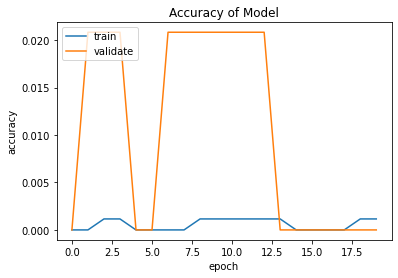

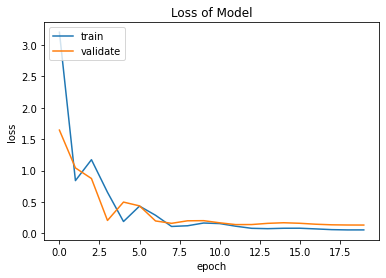

In [ ]:
from tensorflow.keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss=losses.MSE,
             metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)


print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
results

[0.11800063401460648, 0.012500000186264515]

In [ ]:
def predict(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 상위권의 곡이 아닐까 추측합니다.\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 하위권의 곡이 아닐까 추측합니다.\n".format(review, (1 - score) * 100))

In [ ]:
predict(
'''
언제나 꿈꿔 온 순간이
여기 지금 내게 시작되고 있어
그렇게 너를 사랑했던
내 마음을 넌 받아 주었어
오 내 기분만큼 밝은 태양과
시원한 바람들이 내게 다가와
나는 이렇게 행복을 느껴
하늘은 우릴 항해 열려 있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
같은 시간 속에 이렇게
함께 있는 것만으로도 난 좋아
행복한 미소에 니 얼굴
나 더 이상 무얼 바라겠니
저 파란 하늘 아래서 너와 나
여기 이렇게 사랑하고 있어
나는 이렇게 행복을 느껴
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
더 이상 슬픔은 없는 거야
지금 행복한 너와 나
태양 아래 우린 서로가
사랑하는 걸 알아
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
너는 푸른 바다야
난 너를 사랑해 난 너를 사랑해
난 너를 사랑해 난 너를 사랑해
'''
)

[
언제나 꿈꿔 온 순간이
여기 지금 내게 시작되고 있어
그렇게 너를 사랑했던
내 마음을 넌 받아 주었어
오 내 기분만큼 밝은 태양과
시원한 바람들이 내게 다가와
나는 이렇게 행복을 느껴
하늘은 우릴 항해 열려 있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
같은 시간 속에 이렇게
함께 있는 것만으로도 난 좋아
행복한 미소에 니 얼굴
나 더 이상 무얼 바라겠니
저 파란 하늘 아래서 너와 나
여기 이렇게 사랑하고 있어
나는 이렇게 행복을 느껴
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
더 이상 슬픔은 없는 거야
지금 행복한 너와 나
태양 아래 우린 서로가
사랑하는 걸 알아
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
하늘은 우릴 향해 열려있어
그리고 내 곁에는 니가 있어
환한 미소와 함께 서 있는
그래 너는 푸른 바다야
너는 푸른 바다야
난 너를 사랑해 난 너를 사랑해
난 너를 사랑해 난 너를 사랑해
]는 59.21% 확률로 상위권의 곡이 아닐까 추측합니다.



In [ ]:
predict(
'''
같은 시간 속에 서로 다른 기억들
우리는 서로를 사랑했을까
한낱 내 감정이 이제 와 의미 있겠니
나 너를 이해하려고 별짓 다 해봤어 난
나쁜 놈 사랑을 내게 가르쳐준
나쁜 놈 이별을 처음 알게 해준
아픈 널 흉터 같은 널
지워보려고 별짓 다 해봤어
나쁜 놈 참 이기적인 사랑 뒤에
아름다운 이별이 어디 있니
내게는 너무 미운 너 그게 아픈 나
많이 사랑했던 나쁜 놈
내게는 쉽지 않던 우리 사랑의 시작이
너에겐 이별의 준비였었니
그딴 내 노력이 너에겐 당연했었니
나 너를 미워하려고 별짓 다 해봤어 난
나쁜 놈 사랑을 내게 가르쳐준
나쁜 놈 이별을 처음 알게 해준
아픈 널 흉터 같은 널
지워보려고 별짓 다 해봤어
나쁜 놈 참 이기적인 사랑 뒤에
아름다운 이별이 어디 있니
그땐 너무 미워서 그게 아파서
너에게 미친 나 나에게 지친 너
어떻게든 널 되돌려보려고
별짓 다 해봤어 난
나쁜 놈 눈물로 나를 적시고 간
나쁜 놈 추억에 나를 미치게 한
아픈 널 상처가 된 널 지워보려고
별짓 다 해봤어
언젠가 네가 나에게 기대했던
아름다운 이별이 있다면
그건 사랑이 아냐 진짜가 아냐
많이 보고 싶은 나쁜 놈
''')

[
같은 시간 속에 서로 다른 기억들
우리는 서로를 사랑했을까
한낱 내 감정이 이제 와 의미 있겠니
나 너를 이해하려고 별짓 다 해봤어 난
나쁜 놈 사랑을 내게 가르쳐준
나쁜 놈 이별을 처음 알게 해준
아픈 널 흉터 같은 널
지워보려고 별짓 다 해봤어
나쁜 놈 참 이기적인 사랑 뒤에
아름다운 이별이 어디 있니
내게는 너무 미운 너 그게 아픈 나
많이 사랑했던 나쁜 놈
내게는 쉽지 않던 우리 사랑의 시작이
너에겐 이별의 준비였었니
그딴 내 노력이 너에겐 당연했었니
나 너를 미워하려고 별짓 다 해봤어 난
나쁜 놈 사랑을 내게 가르쳐준
나쁜 놈 이별을 처음 알게 해준
아픈 널 흉터 같은 널
지워보려고 별짓 다 해봤어
나쁜 놈 참 이기적인 사랑 뒤에
아름다운 이별이 어디 있니
그땐 너무 미워서 그게 아파서
너에게 미친 나 나에게 지친 너
어떻게든 널 되돌려보려고
별짓 다 해봤어 난
나쁜 놈 눈물로 나를 적시고 간
나쁜 놈 추억에 나를 미치게 한
아픈 널 상처가 된 널 지워보려고
별짓 다 해봤어
언젠가 네가 나에게 기대했던
아름다운 이별이 있다면
그건 사랑이 아냐 진짜가 아냐
많이 보고 싶은 나쁜 놈
]는 54.61% 확률로 하위권의 곡이 아닐까 추측합니다.

